In [1]:
import hhgen.plots as plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.externals import joblib

In [2]:
features = ['hh_m','hh_pt', 'hh_eta','hgg_pt_hh_m','hbb_pt_hh_m','cos_theta_cs','cos_theta_hbb','cos_theta_hgg']
features+=['leadJet_pt','leadJet_eta','subleadJet_pt','subleadJet_eta']
features+=['leadPho_pt','leadPho_eta','subleadPho_pt','subleadPho_eta']

scaler=RobustScaler()

In [3]:
df=pd.read_hdf("node_SM.hd5")

X = df[features]
y = df['cat'] 
w = df['weight']

#slicing data randomly into training and testing sets- we take 20% to be the testing set
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(X,y,w,test_size=0.2, random_state=12351)
w_train = np.abs(w_train)

#scale data
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

clf=joblib.load('clf_opt.joblib')
rw=np.loadtxt("rw_opt.txt")

In [4]:
#reset indices
X_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
w_test.reset_index(drop=True,inplace=True)

Weighted least squares for true/pred plot:  435.467
Weighted least squares for true/pred plot without category 0:  432.251
Spread for truth/pred plot:  1.42679


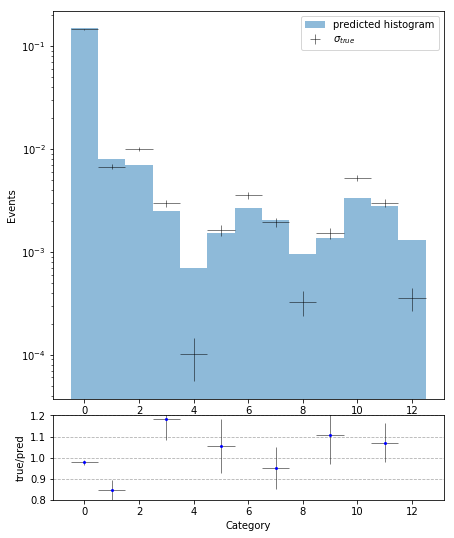

In [5]:
#predicting renormalised probability of each data in test set according to category 
y_pred_prob=clf.predict_proba(X_test)
y_pred_prob/=rw.reshape(1,-1) 
y_pred_prob/=np.sum(y_pred_prob,axis=1,keepdims=True)
#predicting weight of each data in test set according to category
y_pred_weight=np.multiply(y_pred_prob,w_test.reshape(-1,1))
#predicted categories in the form- number of test samples*number of categories
y_pred= np.arange(13).reshape(1,-1)*np.ones_like(y_pred_weight)

plots.plotting(y_pred.ravel(),y_pred_weight.ravel(),y_test,w_test)

In [6]:
#scaling data back
X_test=pd.DataFrame(scaler.inverse_transform(X_test))

In [7]:
#predicted
y_pred_weight=pd.DataFrame(y_pred_weight)

frames=[X_test,y_test,w_test]
df = pd.concat(frames,axis=1,ignore_index=True)

df.columns=['hh_m','hh_pt', 'hh_eta','hgg_pt_hh_m','hbb_pt_hh_m','cos_theta_cs','cos_theta_hbb','cos_theta_hgg',
            'leadJet_pt','leadJet_eta','subleadJet_pt','subleadJet_eta','leadPho_pt','leadPho_eta',
            'subleadPho_pt','subleadPho_eta','cat_true','w_true']

Total number of event in pred hist:  0.148849
Total number of event in true hist:  0.14549


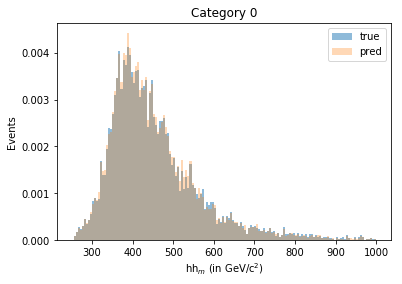

Total number of event in pred hist:  0.00747492
Total number of event in true hist:  0.00623018


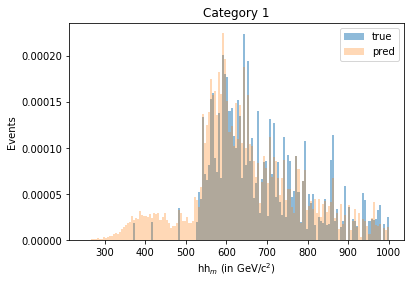

Total number of event in pred hist:  0.00694978
Total number of event in true hist:  0.0100423


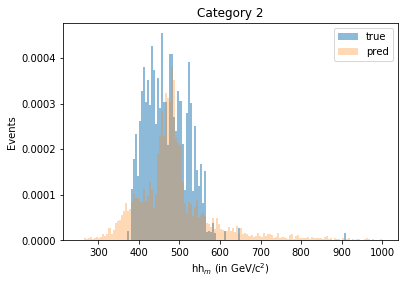

Total number of event in pred hist:  0.00249475
Total number of event in true hist:  0.00297951


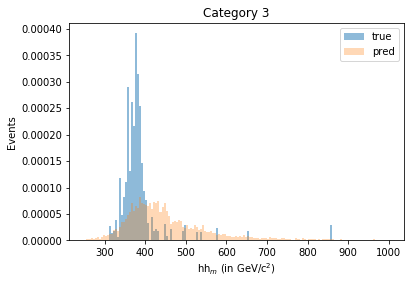

Total number of event in pred hist:  0.000685939
Total number of event in true hist:  0.000101241


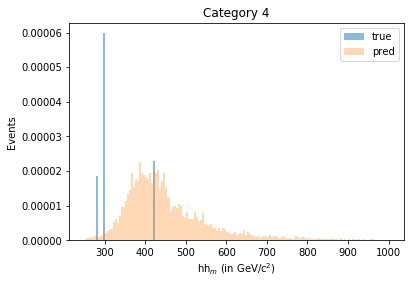

Total number of event in pred hist:  0.00152916
Total number of event in true hist:  0.00158719


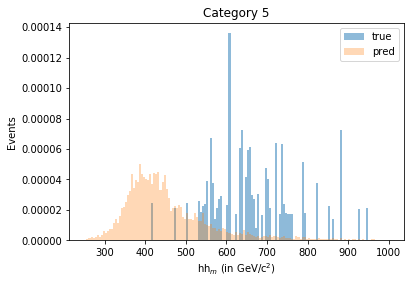

Total number of event in pred hist:  0.00264322
Total number of event in true hist:  0.0035782


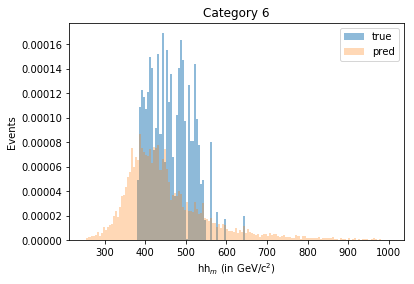

Total number of event in pred hist:  0.00202261
Total number of event in true hist:  0.00194143


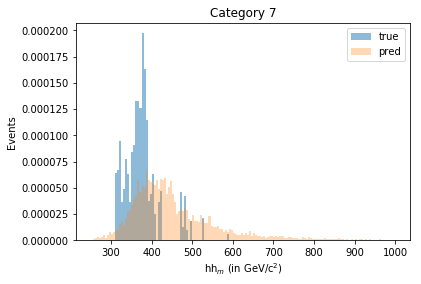

Total number of event in pred hist:  0.000955006
Total number of event in true hist:  0.000328202


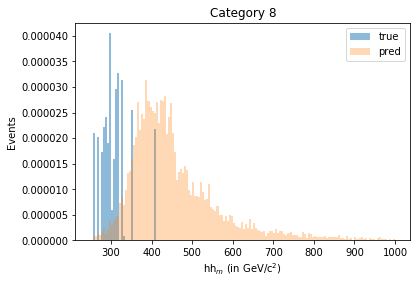

Total number of event in pred hist:  0.00136403
Total number of event in true hist:  0.00144816


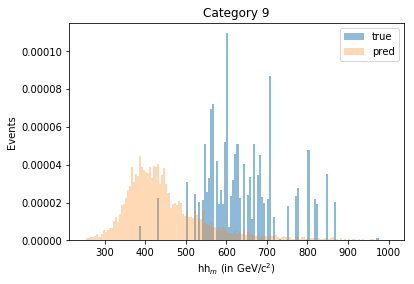

Total number of event in pred hist:  0.00333465
Total number of event in true hist:  0.00528963


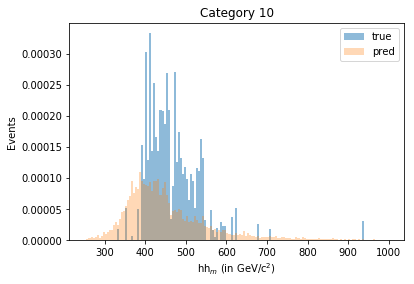

Total number of event in pred hist:  0.00278772
Total number of event in true hist:  0.00300841


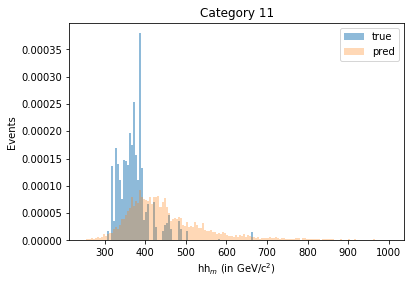

Total number of event in pred hist:  0.00128689
Total number of event in true hist:  0.00035321


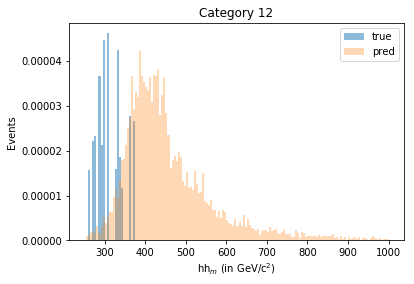

In [8]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['hh_m'],weights=cat_true.w_true,range=[250,1000],bins=150,alpha=0.5,label='true')
    plt.hist(df['hh_m'].ravel(),weights=y_pred_weight[i].ravel(),range=[250,1000],bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['hh_m'],weights=cat_true.w_true,range=[250,1000],bins=150)
    h_pred=np.histogram(df['hh_m'].ravel(),weights=y_pred_weight[i].ravel(),range=[250,1000],bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("hh$_m$ (in GeV/c$^2$)")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.0158177
Total number of event in true hist:  0.0151121


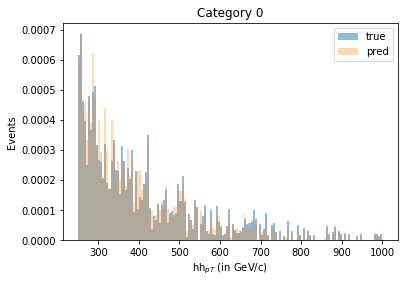

Total number of event in pred hist:  0.00142822
Total number of event in true hist:  0.00142046


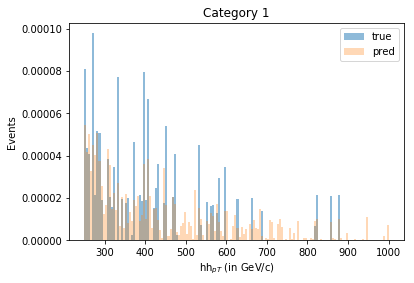

Total number of event in pred hist:  0.00140001
Total number of event in true hist:  0.00205495


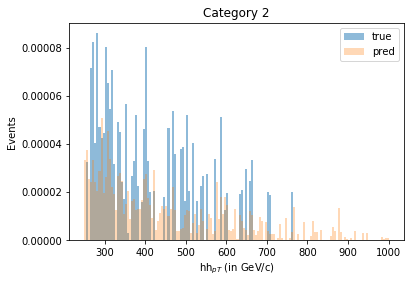

Total number of event in pred hist:  0.000364978
Total number of event in true hist:  0.00073811


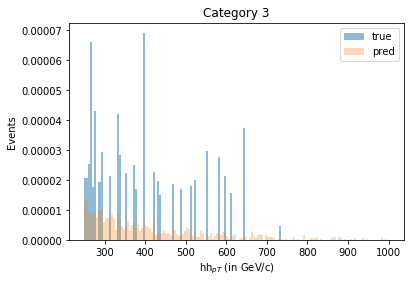

Total number of event in pred hist:  0.000100352
Total number of event in true hist:  2.28951e-05


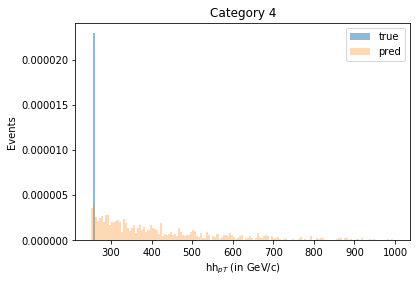

Total number of event in pred hist:  0.000223713
Total number of event in true hist:  0.000387748


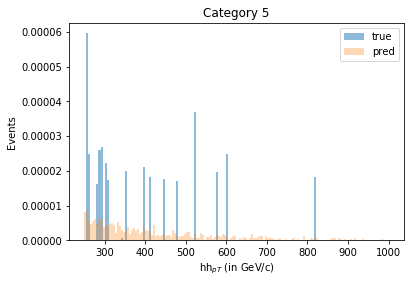

Total number of event in pred hist:  0.000386698
Total number of event in true hist:  0.000511312


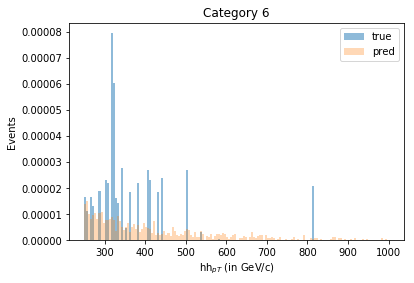

Total number of event in pred hist:  0.000295904
Total number of event in true hist:  0.000303175


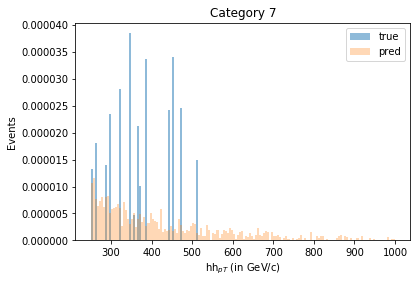

Total number of event in pred hist:  0.000139716
Total number of event in true hist:  3.2736e-05


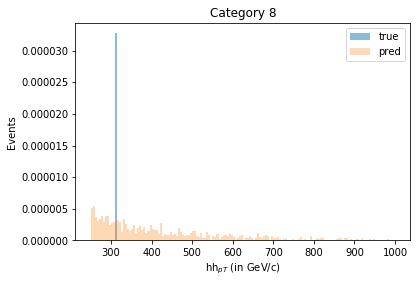

Total number of event in pred hist:  0.000199555
Total number of event in true hist:  0.000249987


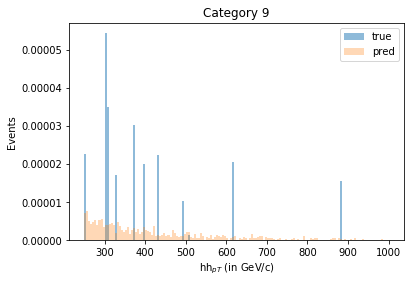

Total number of event in pred hist:  0.000487854
Total number of event in true hist:  0.00044218


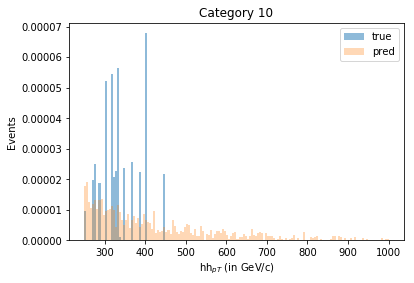

Total number of event in pred hist:  0.000407839
Total number of event in true hist:  0.000110819


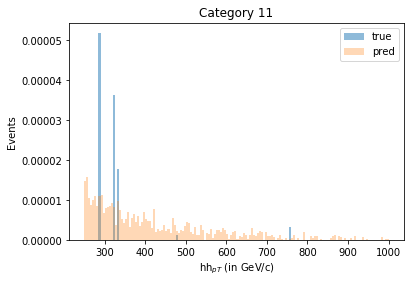

Total number of event in pred hist:  0.00018827
Total number of event in true hist:  5.43717e-05


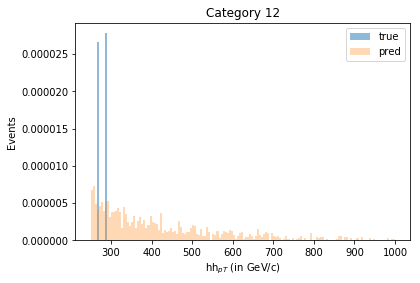

In [9]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['hh_pt'].ravel(),weights=cat_true.w_true.ravel(),range=[250,1000],bins=150,alpha=0.5,label='true')
    plt.hist(df['hh_pt'].ravel(),weights=y_pred_weight[i].ravel(),range=[250,1000],bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['hh_pt'],weights=cat_true.w_true,range=[250,1000],bins=150)
    h_pred=np.histogram(df['hh_pt'].ravel(),weights=y_pred_weight[i].ravel(),range=[250,1000],bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("hh$_{pT}$ (in GeV/c)")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.149873
Total number of event in true hist:  0.146575


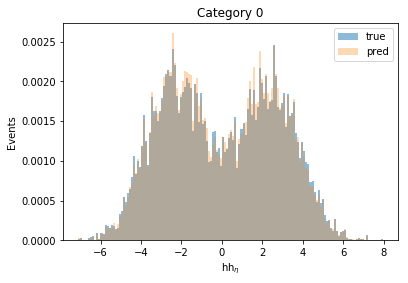

Total number of event in pred hist:  0.0079318
Total number of event in true hist:  0.00672883


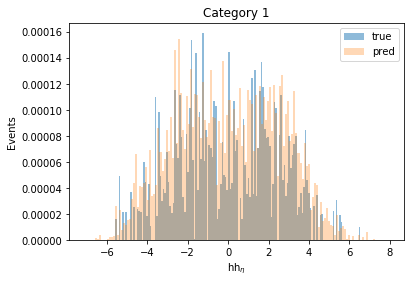

Total number of event in pred hist:  0.00700715
Total number of event in true hist:  0.0100423


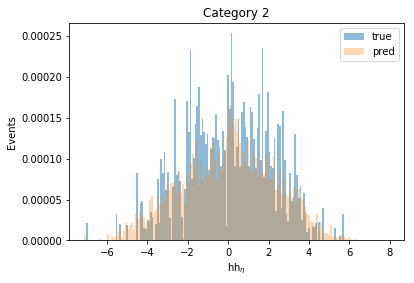

Total number of event in pred hist:  0.00251552
Total number of event in true hist:  0.00297951


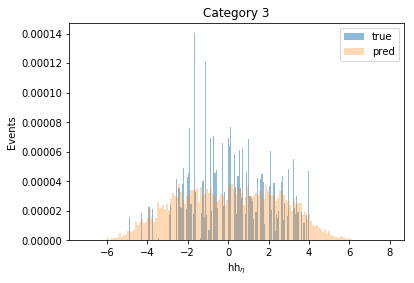

Total number of event in pred hist:  0.00069165
Total number of event in true hist:  0.000101241


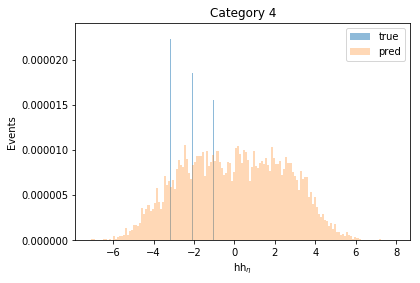

Total number of event in pred hist:  0.00154189
Total number of event in true hist:  0.00162533


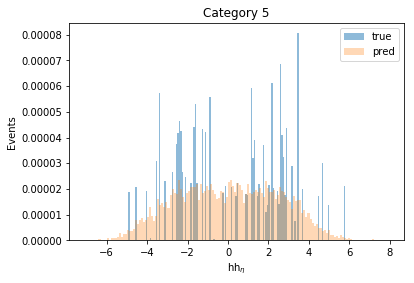

Total number of event in pred hist:  0.00266522
Total number of event in true hist:  0.0035782


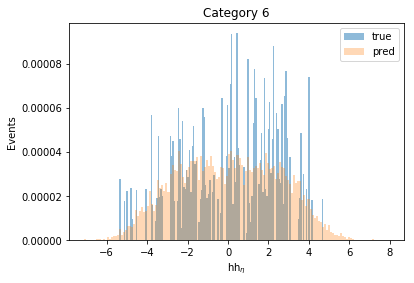

Total number of event in pred hist:  0.00203945
Total number of event in true hist:  0.00194143


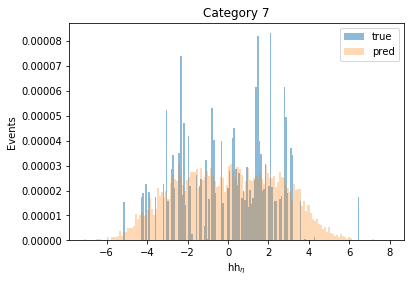

Total number of event in pred hist:  0.000962957
Total number of event in true hist:  0.000328202


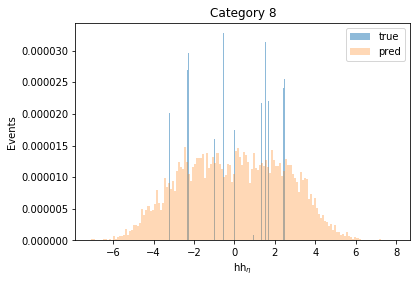

Total number of event in pred hist:  0.00137539
Total number of event in true hist:  0.00152351


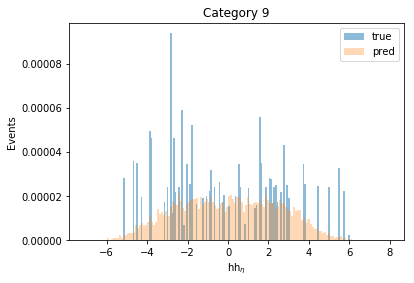

Total number of event in pred hist:  0.00336241
Total number of event in true hist:  0.00528963


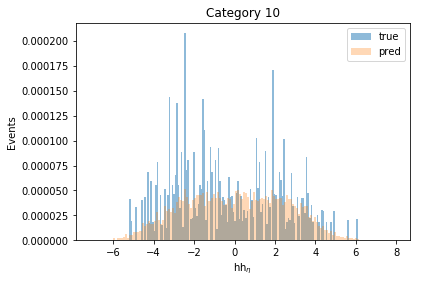

Total number of event in pred hist:  0.00281093
Total number of event in true hist:  0.00300841


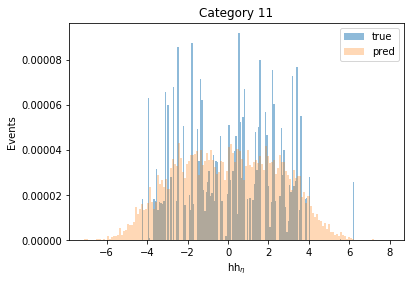

Total number of event in pred hist:  0.00129761
Total number of event in true hist:  0.00035321


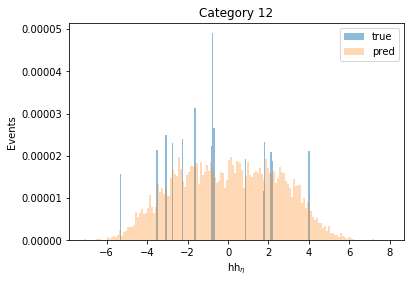

In [10]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['hh_eta'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['hh_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['hh_eta'],weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['hh_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("hh$_{\eta}$")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.149873
Total number of event in true hist:  0.146575


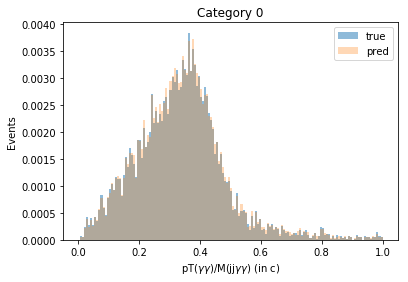

Total number of event in pred hist:  0.0079318
Total number of event in true hist:  0.00672883


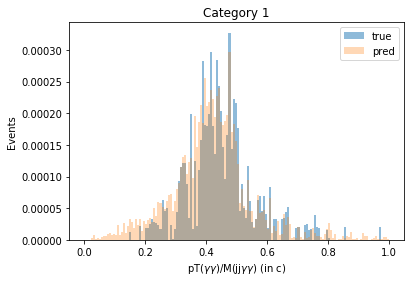

Total number of event in pred hist:  0.00700715
Total number of event in true hist:  0.0100423


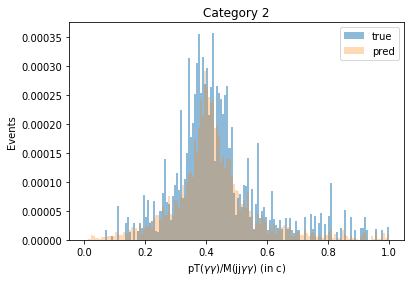

Total number of event in pred hist:  0.00251552
Total number of event in true hist:  0.00297951


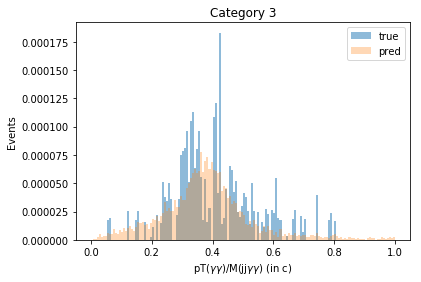

Total number of event in pred hist:  0.00069165
Total number of event in true hist:  0.000101241


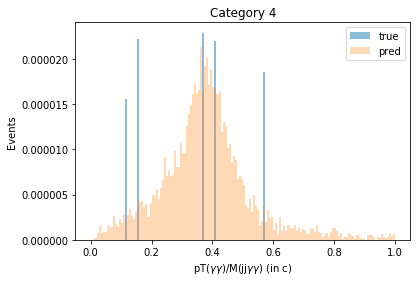

Total number of event in pred hist:  0.00154189
Total number of event in true hist:  0.00162533


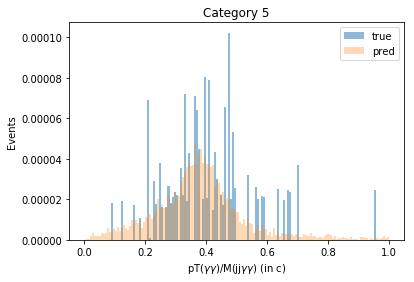

Total number of event in pred hist:  0.00266522
Total number of event in true hist:  0.0035782


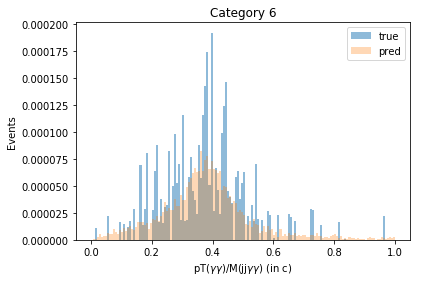

Total number of event in pred hist:  0.00203945
Total number of event in true hist:  0.00194143


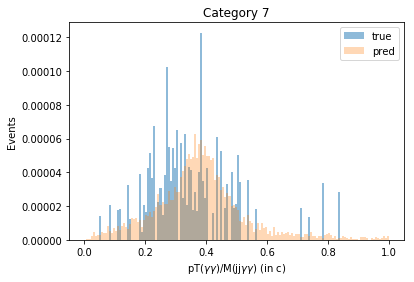

Total number of event in pred hist:  0.000962957
Total number of event in true hist:  0.000328202


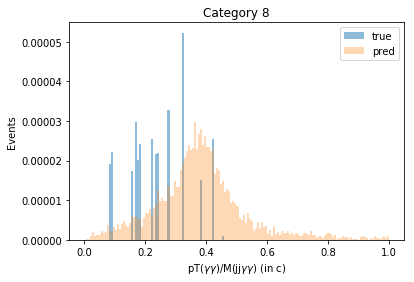

Total number of event in pred hist:  0.00137539
Total number of event in true hist:  0.00152351


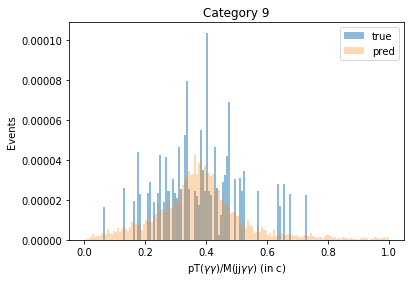

Total number of event in pred hist:  0.00336241
Total number of event in true hist:  0.00528963


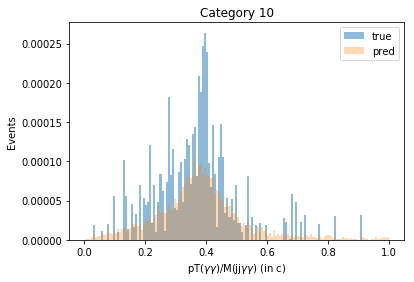

Total number of event in pred hist:  0.00281093
Total number of event in true hist:  0.00300841


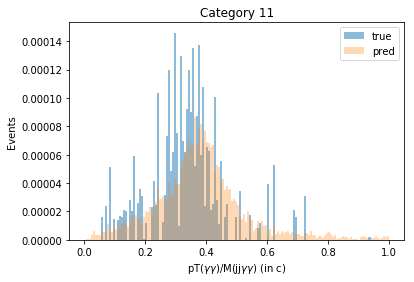

Total number of event in pred hist:  0.00129761
Total number of event in true hist:  0.00035321


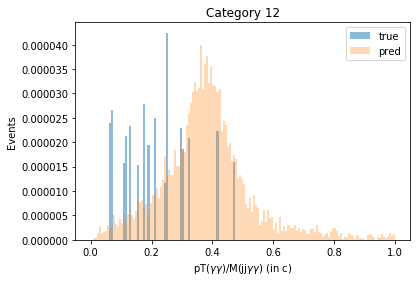

In [11]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['hgg_pt_hh_m'].ravel(),range=[0,1],weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['hgg_pt_hh_m'].ravel(),range=[0,1],weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['hgg_pt_hh_m'],weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['hgg_pt_hh_m'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("pT($\gamma\gamma$)/M(jj$\gamma\gamma$) (in c)")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.149873
Total number of event in true hist:  0.146576


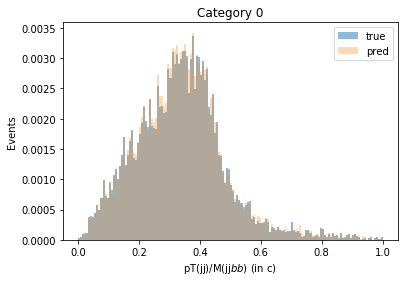

Total number of event in pred hist:  0.0079318
Total number of event in true hist:  0.00672883


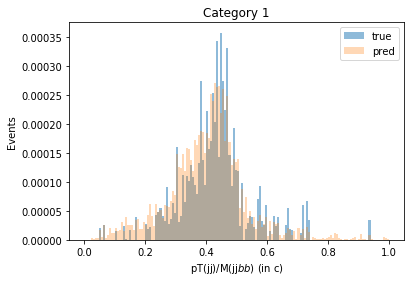

Total number of event in pred hist:  0.00700715
Total number of event in true hist:  0.0100423


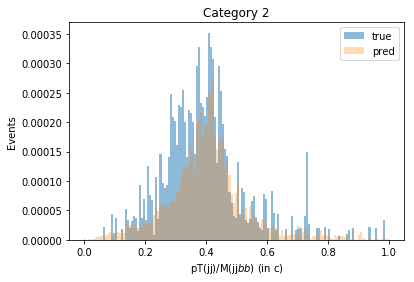

Total number of event in pred hist:  0.00251552
Total number of event in true hist:  0.00297951


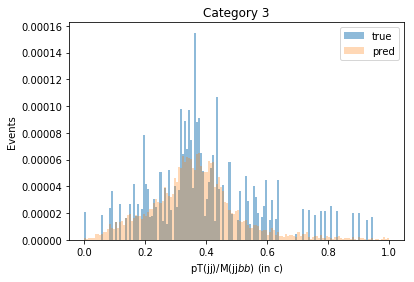

Total number of event in pred hist:  0.00069165
Total number of event in true hist:  0.000101241


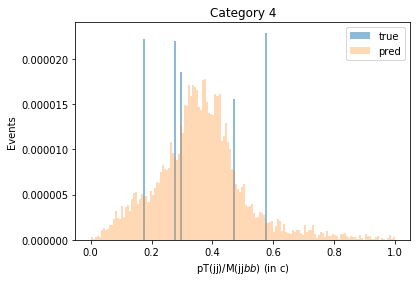

Total number of event in pred hist:  0.00154189
Total number of event in true hist:  0.00162533


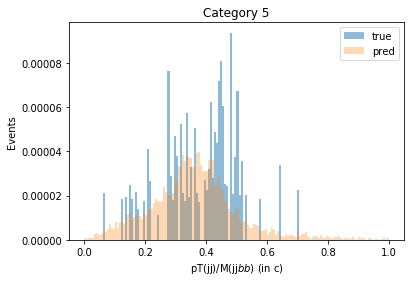

Total number of event in pred hist:  0.00266522
Total number of event in true hist:  0.0035782


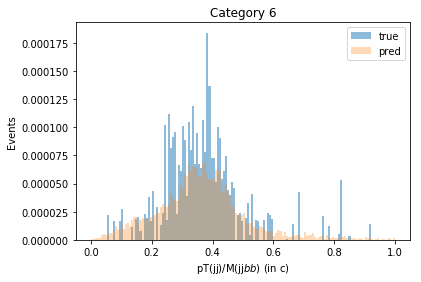

Total number of event in pred hist:  0.00203945
Total number of event in true hist:  0.00194143


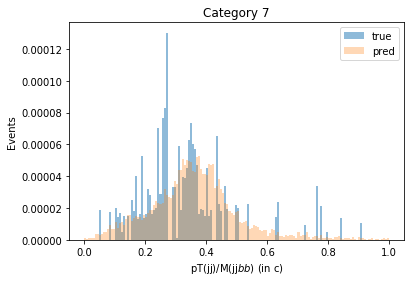

Total number of event in pred hist:  0.000962957
Total number of event in true hist:  0.000328202


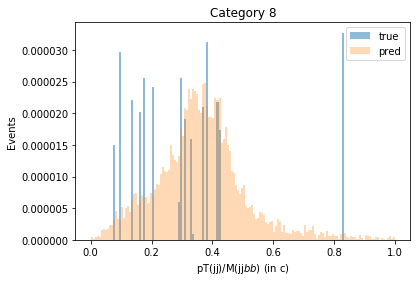

Total number of event in pred hist:  0.00137539
Total number of event in true hist:  0.00152351


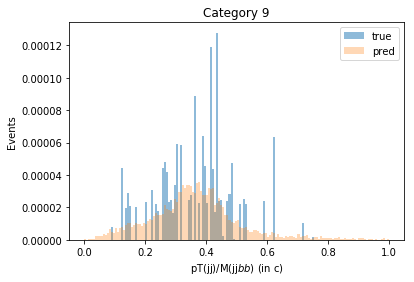

Total number of event in pred hist:  0.00336241
Total number of event in true hist:  0.00528963


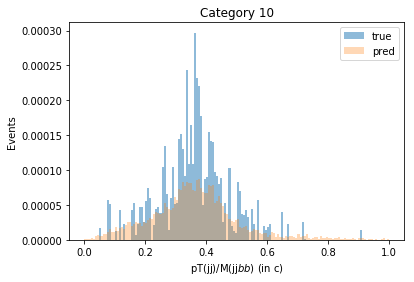

Total number of event in pred hist:  0.00281093
Total number of event in true hist:  0.00300841


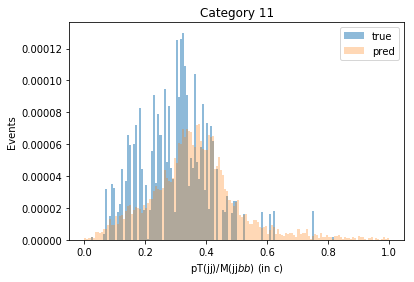

Total number of event in pred hist:  0.00129761
Total number of event in true hist:  0.00035321


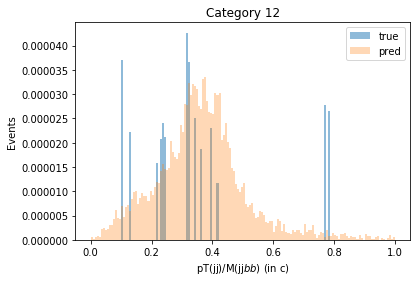

In [12]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['hbb_pt_hh_m'].ravel(),range=[0,1],weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['hbb_pt_hh_m'].ravel(),range=[0,1],weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['hbb_pt_hh_m'],weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['hbb_pt_hh_m'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("pT(jj)/M(jj$bb$) (in c)")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.149873
Total number of event in true hist:  0.146576


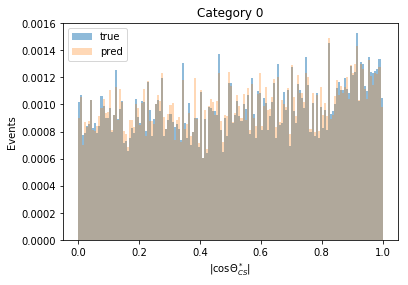

Total number of event in pred hist:  0.0079318
Total number of event in true hist:  0.00672883


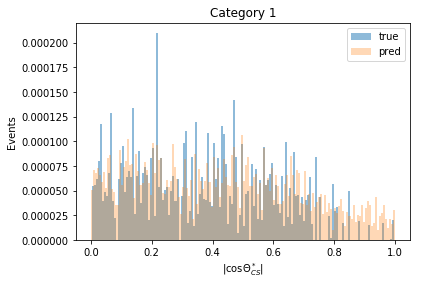

Total number of event in pred hist:  0.00700715
Total number of event in true hist:  0.0100423


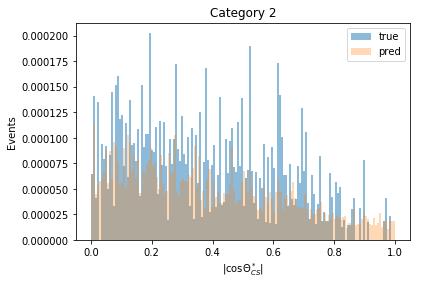

Total number of event in pred hist:  0.00251552
Total number of event in true hist:  0.00297951


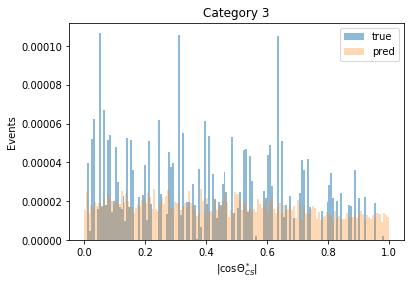

Total number of event in pred hist:  0.00069165
Total number of event in true hist:  0.000101241


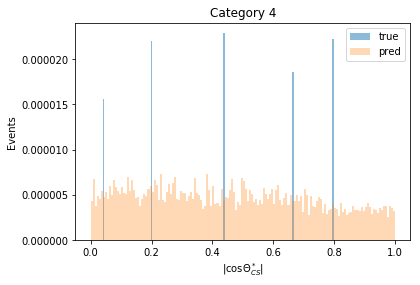

Total number of event in pred hist:  0.00154189
Total number of event in true hist:  0.00162533


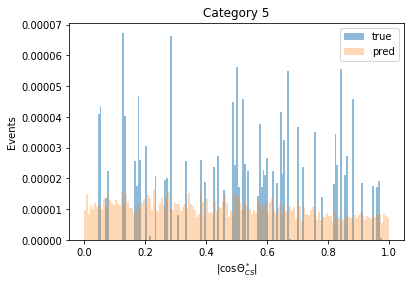

Total number of event in pred hist:  0.00266522
Total number of event in true hist:  0.0035782


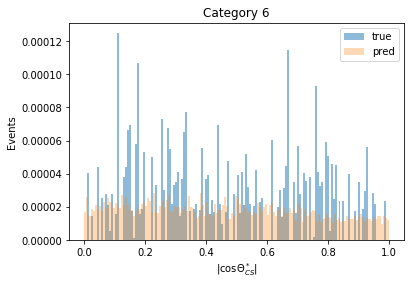

Total number of event in pred hist:  0.00203945
Total number of event in true hist:  0.00194143


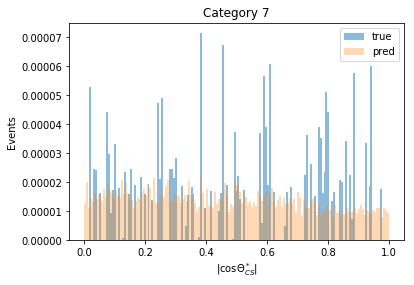

Total number of event in pred hist:  0.000962957
Total number of event in true hist:  0.000328202


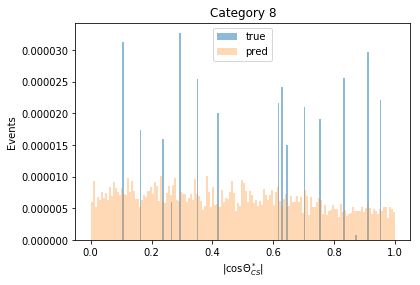

Total number of event in pred hist:  0.00137539
Total number of event in true hist:  0.00152351


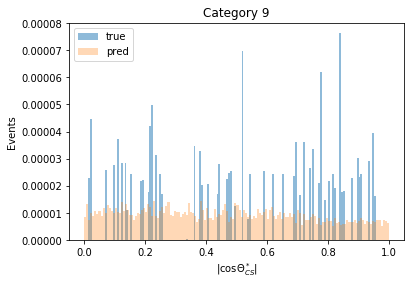

Total number of event in pred hist:  0.00336241
Total number of event in true hist:  0.00528963


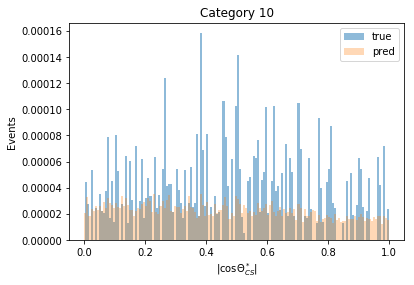

Total number of event in pred hist:  0.00281093
Total number of event in true hist:  0.00300841


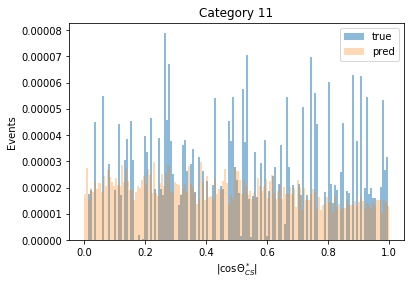

Total number of event in pred hist:  0.00129761
Total number of event in true hist:  0.00035321


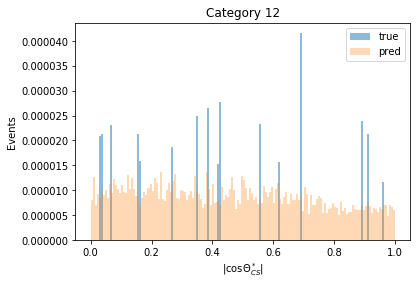

In [13]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(np.abs(cat_true['cos_theta_cs'].ravel()),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(np.abs(df['cos_theta_cs'].ravel()),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(np.abs(cat_true['cos_theta_cs'].ravel()),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(np.abs(df['cos_theta_cs'].ravel()),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("|cos$\Theta_{CS}^*$|")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.149873
Total number of event in true hist:  0.146575


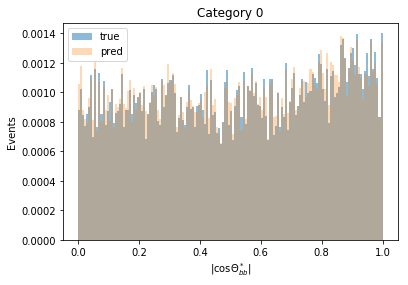

Total number of event in pred hist:  0.0079318
Total number of event in true hist:  0.00672883


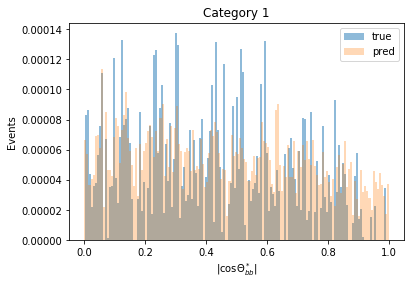

Total number of event in pred hist:  0.00700715
Total number of event in true hist:  0.0100423


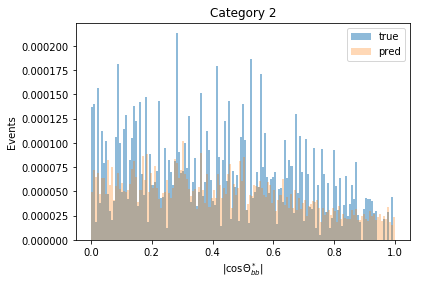

Total number of event in pred hist:  0.00251552
Total number of event in true hist:  0.00297951


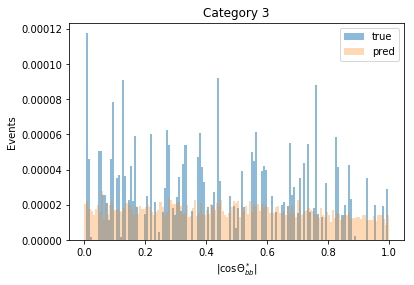

Total number of event in pred hist:  0.00069165
Total number of event in true hist:  0.000101241


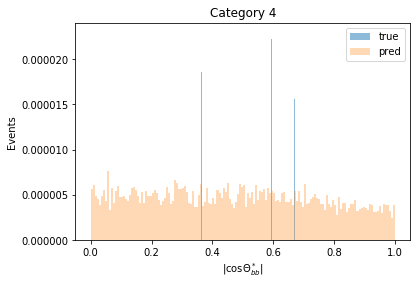

Total number of event in pred hist:  0.00154189
Total number of event in true hist:  0.00162533


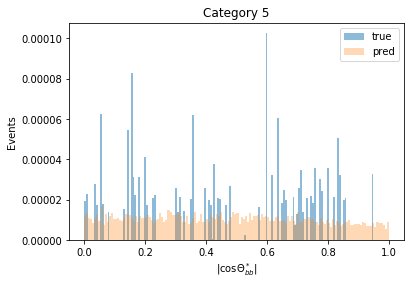

Total number of event in pred hist:  0.00266522
Total number of event in true hist:  0.0035782


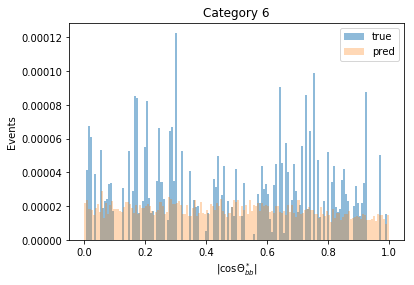

Total number of event in pred hist:  0.00203945
Total number of event in true hist:  0.00194143


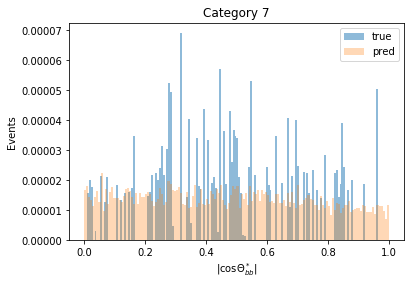

Total number of event in pred hist:  0.000962957
Total number of event in true hist:  0.000328202


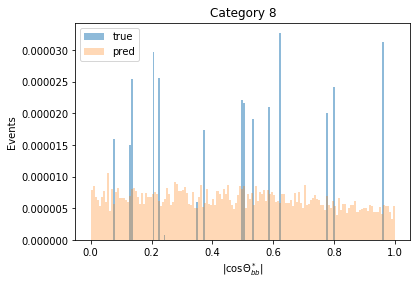

Total number of event in pred hist:  0.00137539
Total number of event in true hist:  0.00152351


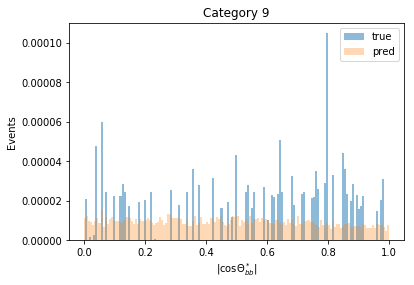

Total number of event in pred hist:  0.00336241
Total number of event in true hist:  0.00528963


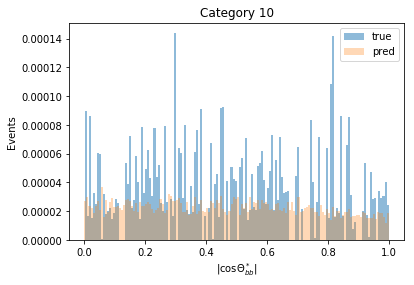

Total number of event in pred hist:  0.00281093
Total number of event in true hist:  0.00300841


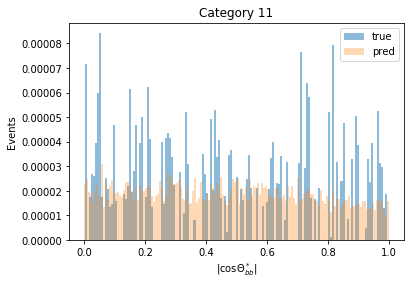

Total number of event in pred hist:  0.00129761
Total number of event in true hist:  0.00035321


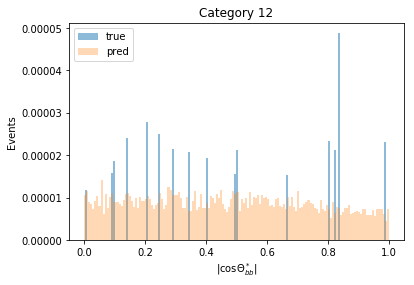

In [14]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(np.abs(cat_true['cos_theta_hbb'].ravel()),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(np.abs(df['cos_theta_hbb'].ravel()),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(np.abs(cat_true['cos_theta_hbb'].ravel()),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(np.abs(df['cos_theta_hbb'].ravel()),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("|cos$\Theta_{bb}^*$|")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.149873
Total number of event in true hist:  0.146575


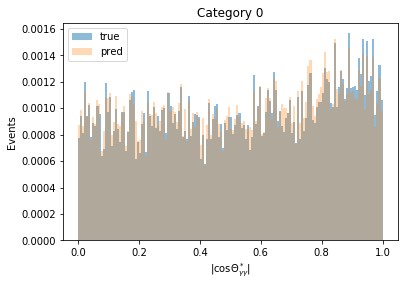

Total number of event in pred hist:  0.0079318
Total number of event in true hist:  0.00672883


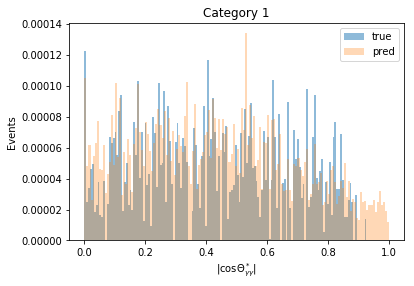

Total number of event in pred hist:  0.00700715
Total number of event in true hist:  0.0100423


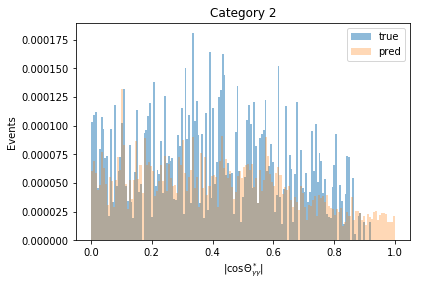

Total number of event in pred hist:  0.00251552
Total number of event in true hist:  0.00297951


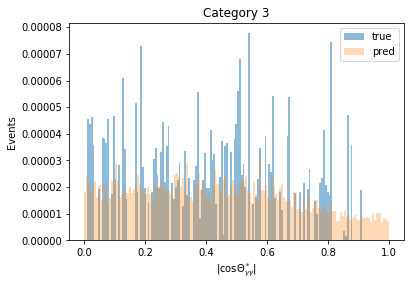

Total number of event in pred hist:  0.00069165
Total number of event in true hist:  0.000101241


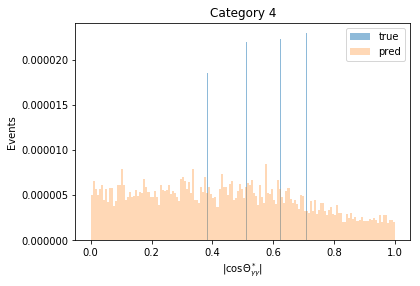

Total number of event in pred hist:  0.00154189
Total number of event in true hist:  0.00162533


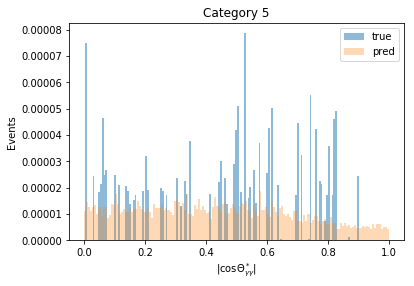

Total number of event in pred hist:  0.00266522
Total number of event in true hist:  0.0035782


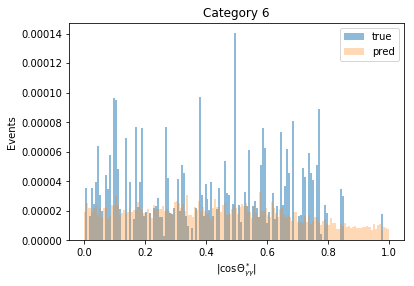

Total number of event in pred hist:  0.00203945
Total number of event in true hist:  0.00194143


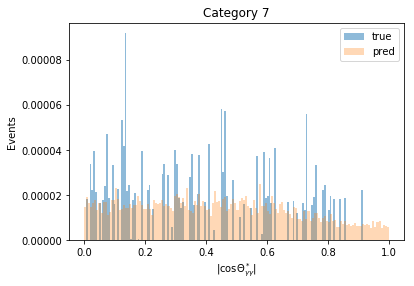

Total number of event in pred hist:  0.000962957
Total number of event in true hist:  0.000328202


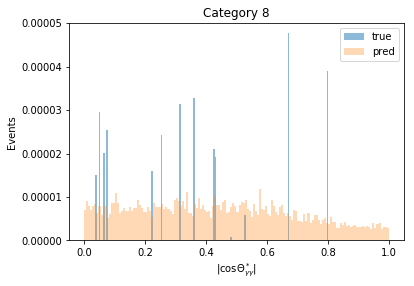

Total number of event in pred hist:  0.00137539
Total number of event in true hist:  0.00152351


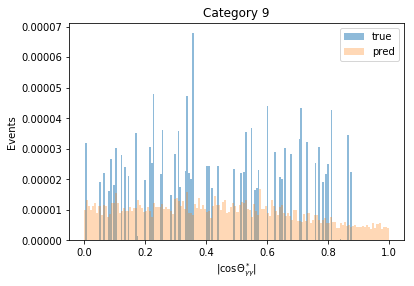

Total number of event in pred hist:  0.00336241
Total number of event in true hist:  0.00528963


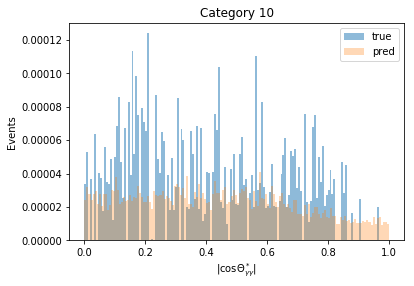

Total number of event in pred hist:  0.00281093
Total number of event in true hist:  0.00300841


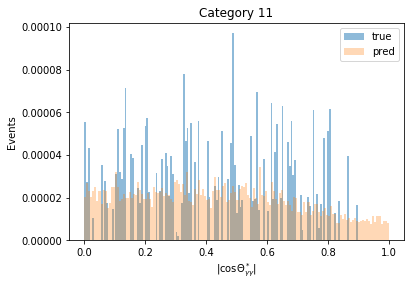

Total number of event in pred hist:  0.00129761
Total number of event in true hist:  0.00035321


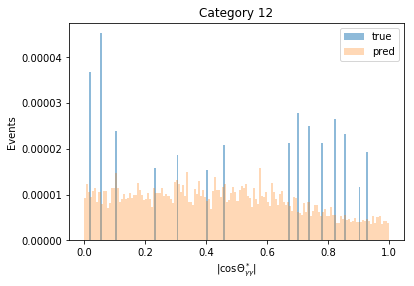

In [15]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(np.abs(cat_true['cos_theta_hgg'].ravel()),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(np.abs(df['cos_theta_hgg'].ravel()),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(np.abs(cat_true['cos_theta_hgg'].ravel()),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(np.abs(df['cos_theta_hgg'].ravel()),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("|cos$\Theta_{\gamma\gamma}^*$|")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.149873
Total number of event in true hist:  0.146575


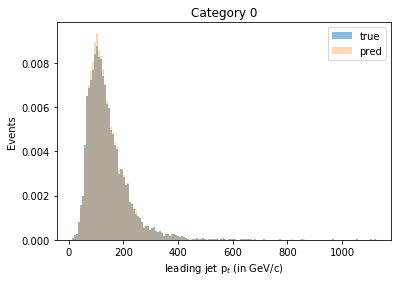

Total number of event in pred hist:  0.0079318
Total number of event in true hist:  0.00672883


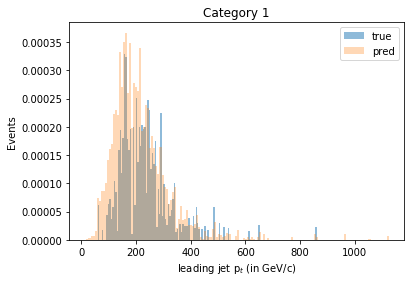

Total number of event in pred hist:  0.00700715
Total number of event in true hist:  0.0100423


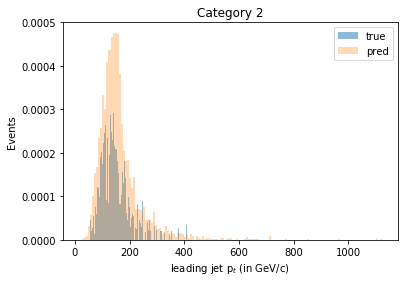

Total number of event in pred hist:  0.00251552
Total number of event in true hist:  0.00297951


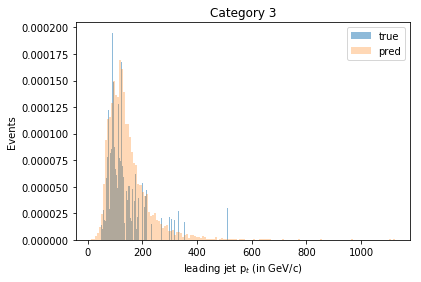

Total number of event in pred hist:  0.00069165
Total number of event in true hist:  0.000101241


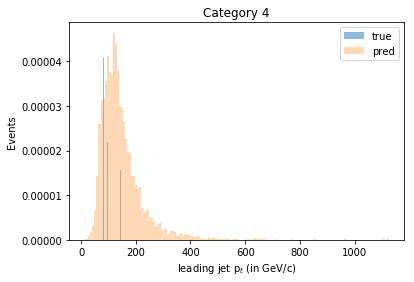

Total number of event in pred hist:  0.00154189
Total number of event in true hist:  0.00162533


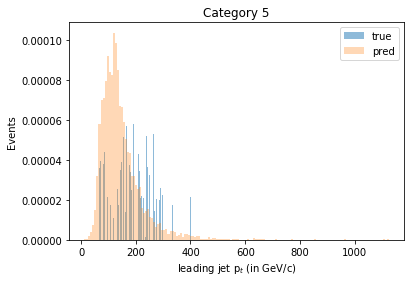

Total number of event in pred hist:  0.00266522
Total number of event in true hist:  0.0035782


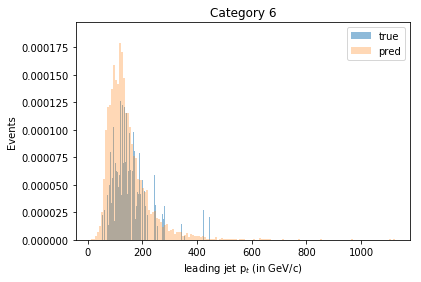

Total number of event in pred hist:  0.00203945
Total number of event in true hist:  0.00194143


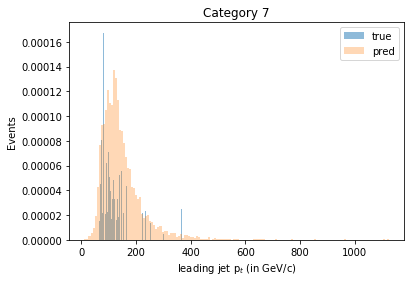

Total number of event in pred hist:  0.000962957
Total number of event in true hist:  0.000328202


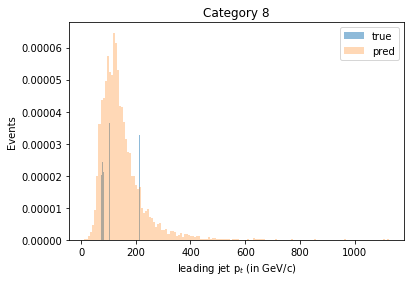

Total number of event in pred hist:  0.00137539
Total number of event in true hist:  0.00152351


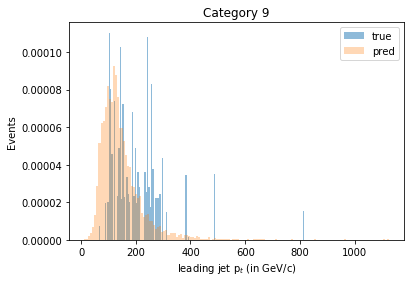

Total number of event in pred hist:  0.00336241
Total number of event in true hist:  0.00528963


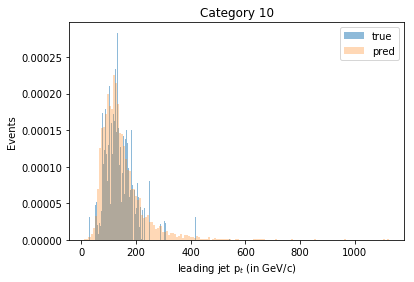

Total number of event in pred hist:  0.00281093
Total number of event in true hist:  0.00300841


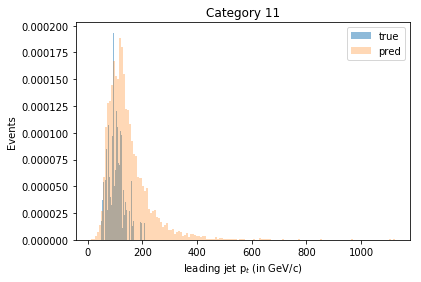

Total number of event in pred hist:  0.00129761
Total number of event in true hist:  0.00035321


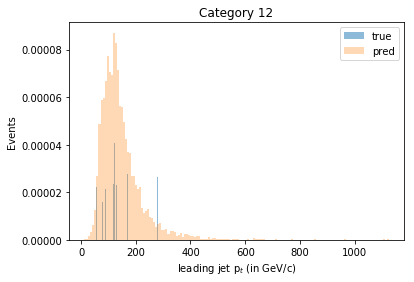

In [16]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['leadJet_pt'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['leadJet_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['leadJet_pt'].ravel(),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['leadJet_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("leading jet p$_t$ (in GeV/c)")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.149873
Total number of event in true hist:  0.146576


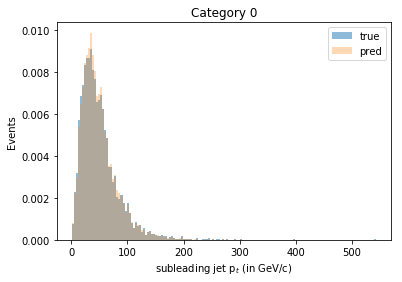

Total number of event in pred hist:  0.0079318
Total number of event in true hist:  0.00672883


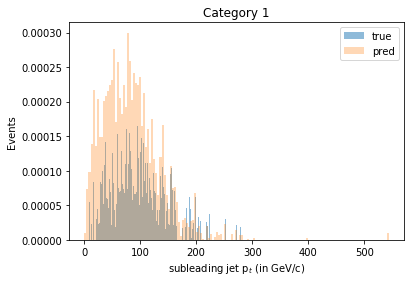

Total number of event in pred hist:  0.00700715
Total number of event in true hist:  0.0100423


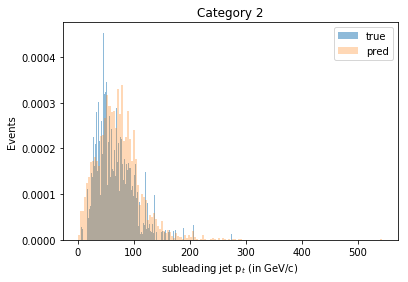

Total number of event in pred hist:  0.00251552
Total number of event in true hist:  0.00297951


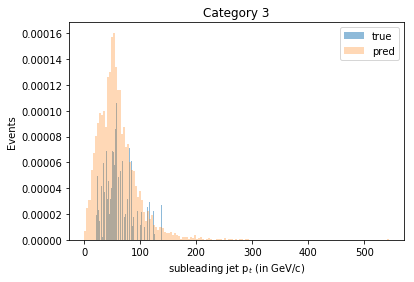

Total number of event in pred hist:  0.00069165
Total number of event in true hist:  0.000101241


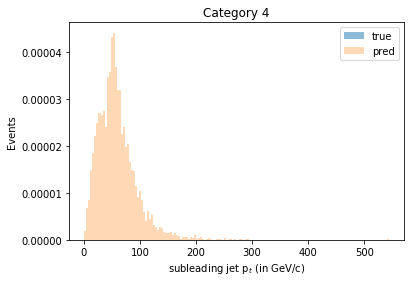

Total number of event in pred hist:  0.00154189
Total number of event in true hist:  0.00162533


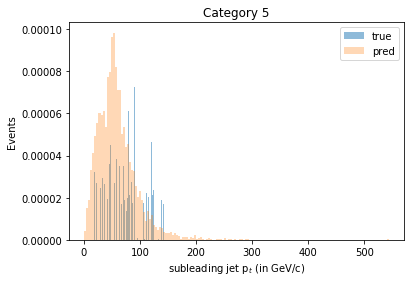

Total number of event in pred hist:  0.00266522
Total number of event in true hist:  0.0035782


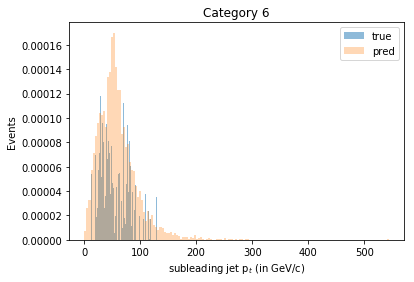

Total number of event in pred hist:  0.00203945
Total number of event in true hist:  0.00194143


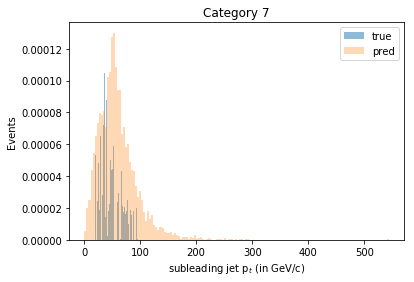

Total number of event in pred hist:  0.000962957
Total number of event in true hist:  0.000328202


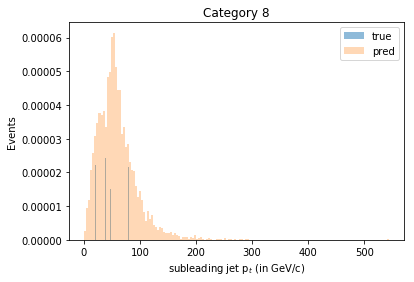

Total number of event in pred hist:  0.00137539
Total number of event in true hist:  0.00152351


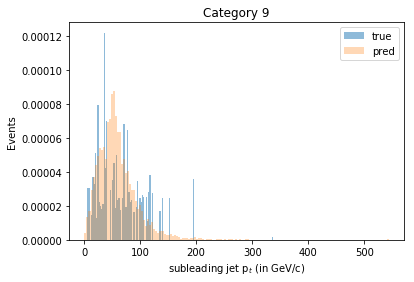

Total number of event in pred hist:  0.00336241
Total number of event in true hist:  0.00528963


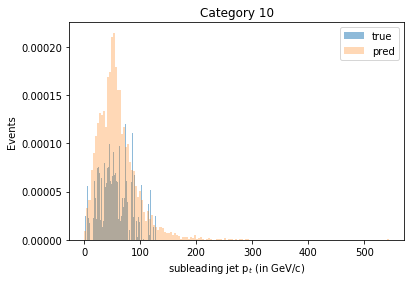

Total number of event in pred hist:  0.00281093
Total number of event in true hist:  0.00300841


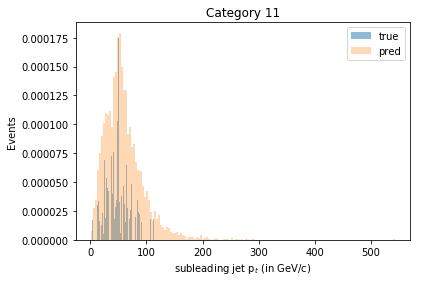

Total number of event in pred hist:  0.00129761
Total number of event in true hist:  0.00035321


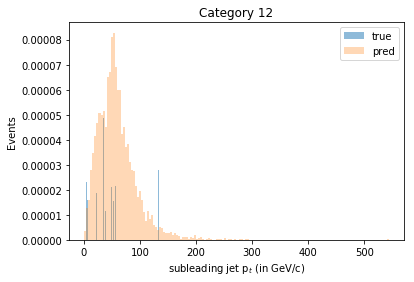

In [17]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['subleadJet_pt'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['subleadJet_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['subleadJet_pt'].ravel(),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['subleadJet_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("subleading jet p$_t$ (in GeV/c)")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.149873
Total number of event in true hist:  0.146575


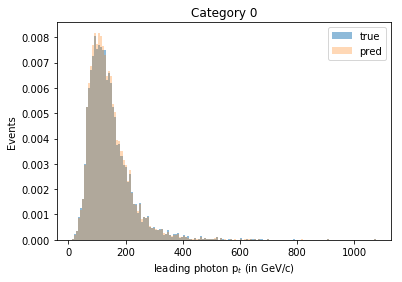

Total number of event in pred hist:  0.0079318
Total number of event in true hist:  0.00672883


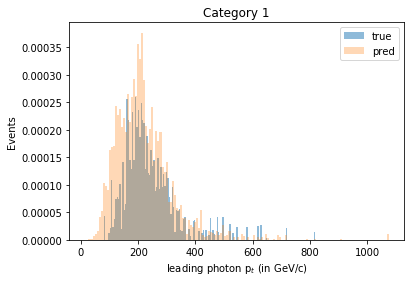

Total number of event in pred hist:  0.00700715
Total number of event in true hist:  0.0100423


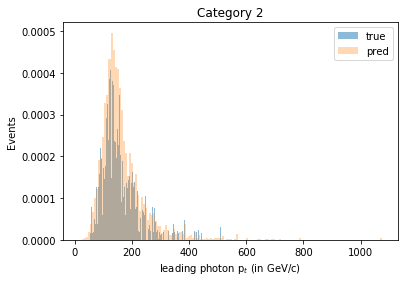

Total number of event in pred hist:  0.00251552
Total number of event in true hist:  0.00297951


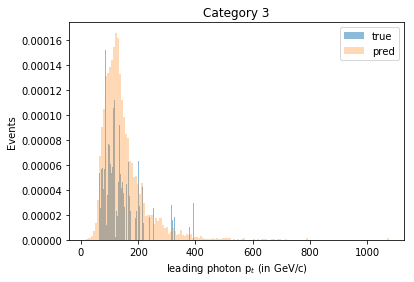

Total number of event in pred hist:  0.00069165
Total number of event in true hist:  0.000101241


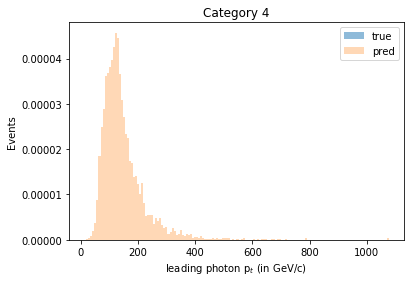

Total number of event in pred hist:  0.00154189
Total number of event in true hist:  0.00162533


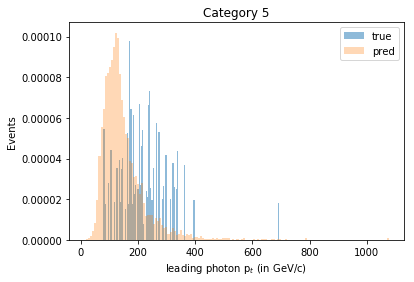

Total number of event in pred hist:  0.00266522
Total number of event in true hist:  0.0035782


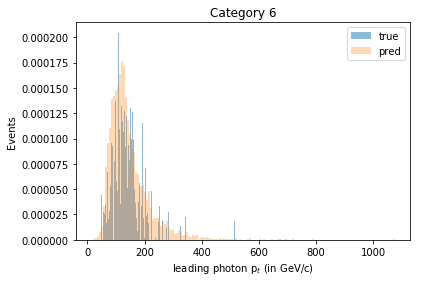

Total number of event in pred hist:  0.00203945
Total number of event in true hist:  0.00194143


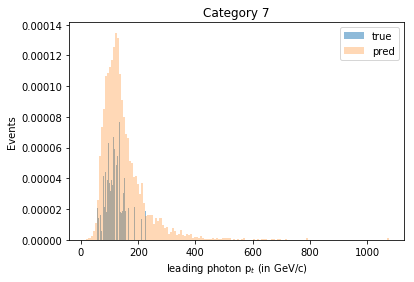

Total number of event in pred hist:  0.000962957
Total number of event in true hist:  0.000328202


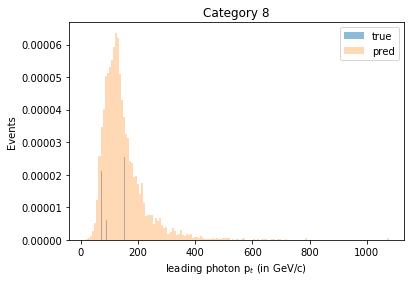

Total number of event in pred hist:  0.00137539
Total number of event in true hist:  0.00152351


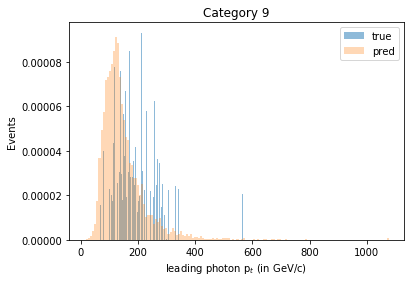

Total number of event in pred hist:  0.00336241
Total number of event in true hist:  0.00528963


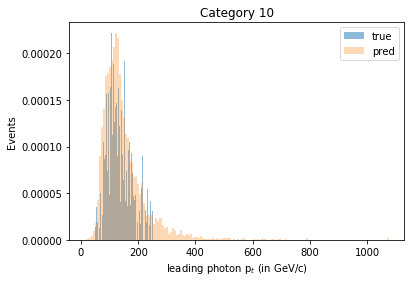

Total number of event in pred hist:  0.00281093
Total number of event in true hist:  0.00300841


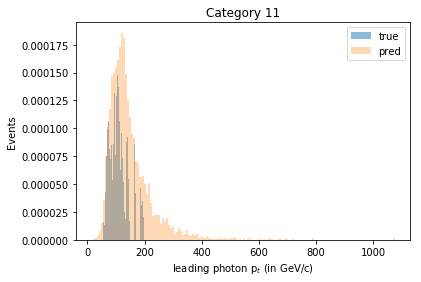

Total number of event in pred hist:  0.00129761
Total number of event in true hist:  0.00035321


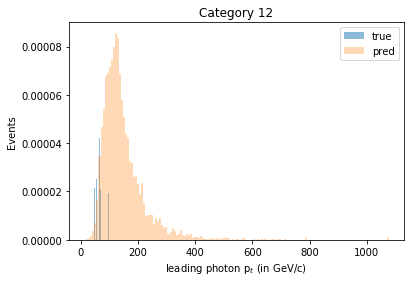

In [18]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['leadPho_pt'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['leadPho_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['leadPho_pt'].ravel(),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['leadPho_pt'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("leading photon p$_t$ (in GeV/c)")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.149873
Total number of event in true hist:  0.146576


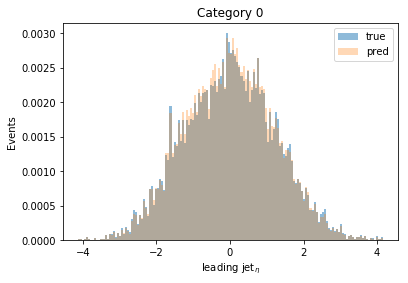

Total number of event in pred hist:  0.0079318
Total number of event in true hist:  0.00672883


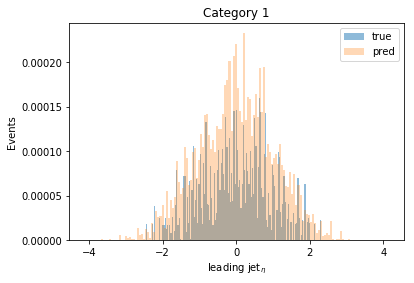

Total number of event in pred hist:  0.00700715
Total number of event in true hist:  0.0100423


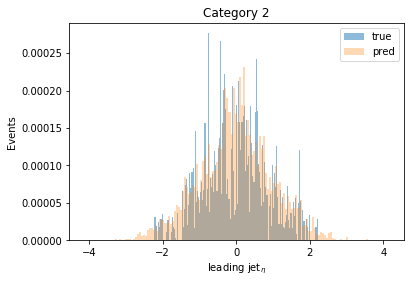

Total number of event in pred hist:  0.00251552
Total number of event in true hist:  0.00297951


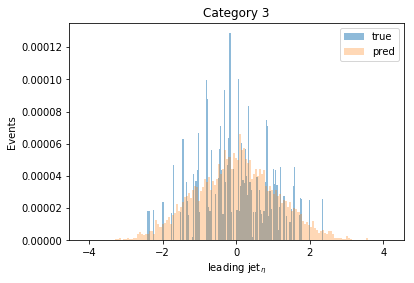

Total number of event in pred hist:  0.00069165
Total number of event in true hist:  0.000101241


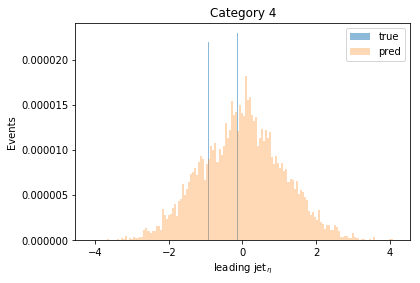

Total number of event in pred hist:  0.00154189
Total number of event in true hist:  0.00162533


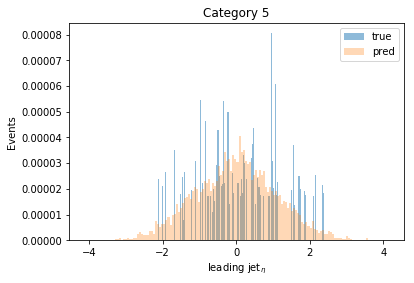

Total number of event in pred hist:  0.00266522
Total number of event in true hist:  0.0035782


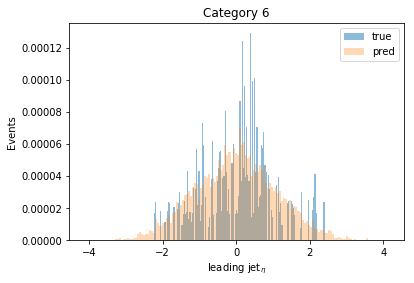

Total number of event in pred hist:  0.00203945
Total number of event in true hist:  0.00194143


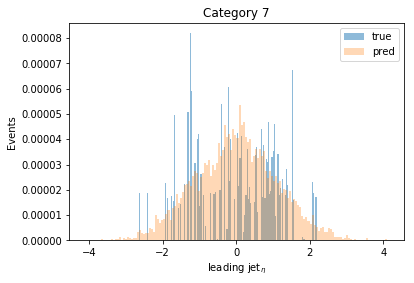

Total number of event in pred hist:  0.000962957
Total number of event in true hist:  0.000328202


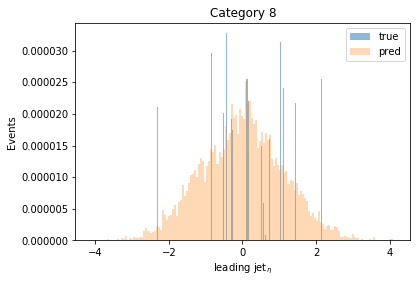

Total number of event in pred hist:  0.00137539
Total number of event in true hist:  0.00152351


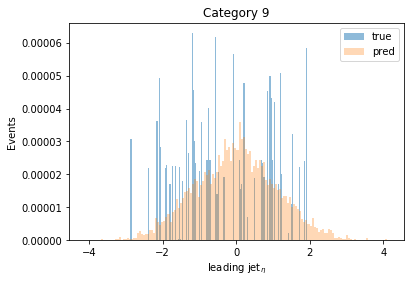

Total number of event in pred hist:  0.00336241
Total number of event in true hist:  0.00528963


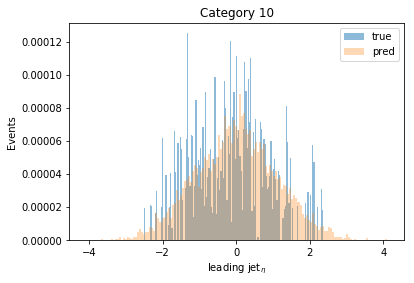

Total number of event in pred hist:  0.00281093
Total number of event in true hist:  0.00300841


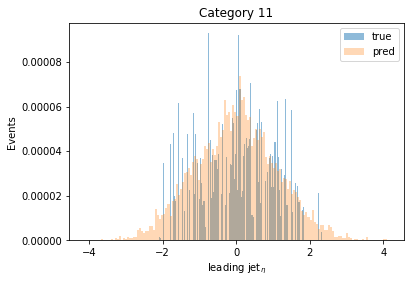

Total number of event in pred hist:  0.00129761
Total number of event in true hist:  0.00035321


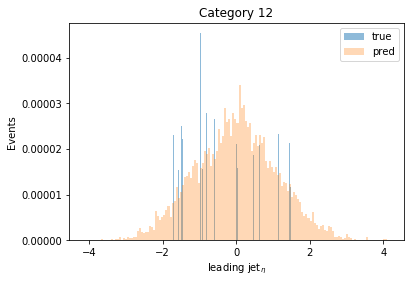

In [19]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['leadJet_eta'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['leadJet_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['leadJet_eta'].ravel(),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['leadJet_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("leading jet$_{\eta}$")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.149873
Total number of event in true hist:  0.146575


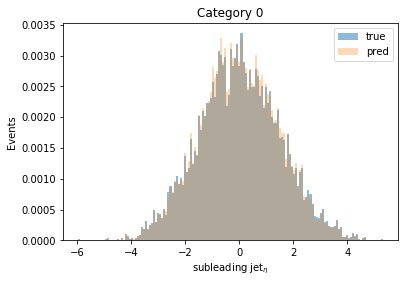

Total number of event in pred hist:  0.0079318
Total number of event in true hist:  0.00672883


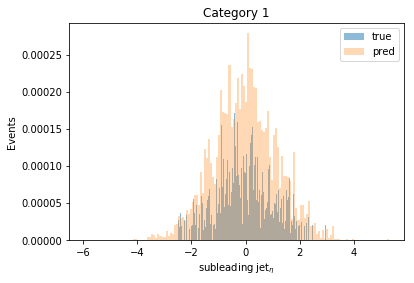

Total number of event in pred hist:  0.00700715
Total number of event in true hist:  0.0100423


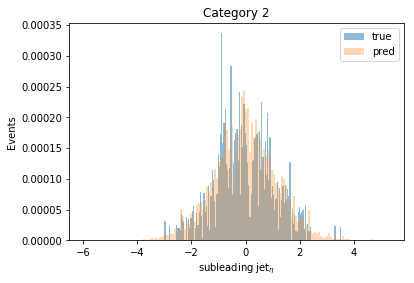

Total number of event in pred hist:  0.00251552
Total number of event in true hist:  0.00297951


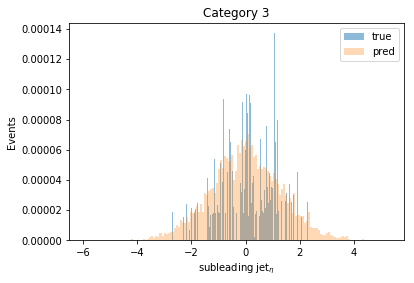

Total number of event in pred hist:  0.00069165
Total number of event in true hist:  0.000101241


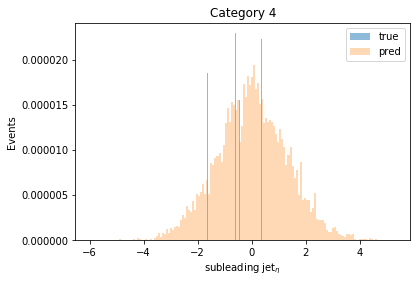

Total number of event in pred hist:  0.00154189
Total number of event in true hist:  0.00162533


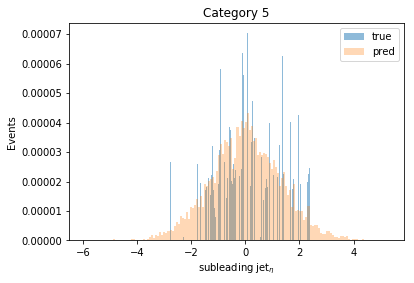

Total number of event in pred hist:  0.00266522
Total number of event in true hist:  0.0035782


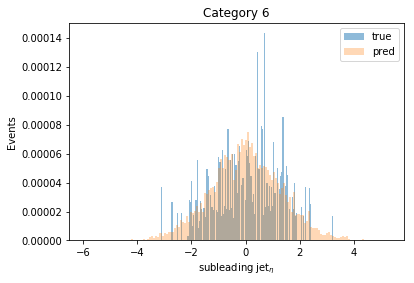

Total number of event in pred hist:  0.00203945
Total number of event in true hist:  0.00194143


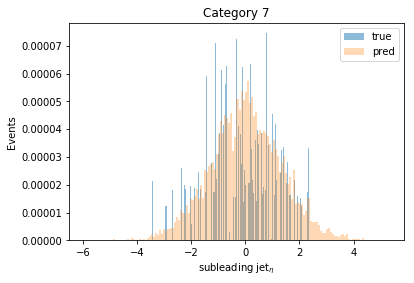

Total number of event in pred hist:  0.000962957
Total number of event in true hist:  0.000328202


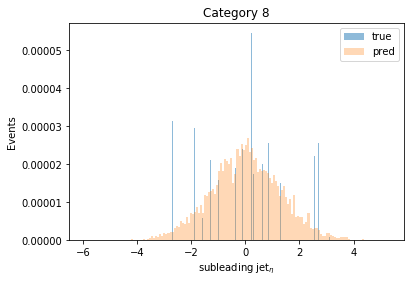

Total number of event in pred hist:  0.00137539
Total number of event in true hist:  0.00152351


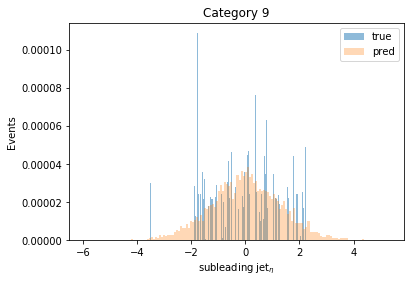

Total number of event in pred hist:  0.00336241
Total number of event in true hist:  0.00528963


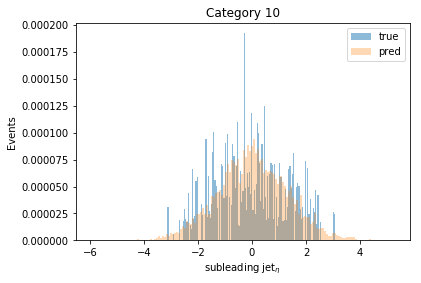

Total number of event in pred hist:  0.00281093
Total number of event in true hist:  0.00300841


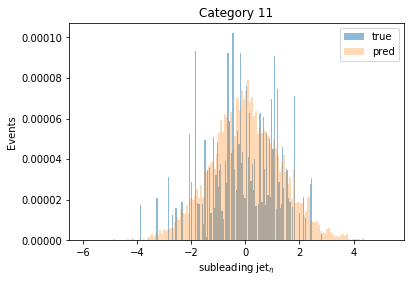

Total number of event in pred hist:  0.00129761
Total number of event in true hist:  0.00035321


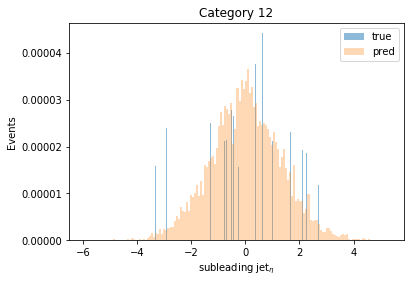

In [20]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['subleadJet_eta'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['subleadJet_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['subleadJet_eta'].ravel(),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['subleadJet_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("subleading jet$_{\eta}$")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.149873
Total number of event in true hist:  0.146576


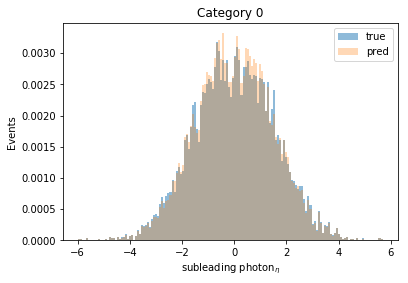

Total number of event in pred hist:  0.0079318
Total number of event in true hist:  0.00672883


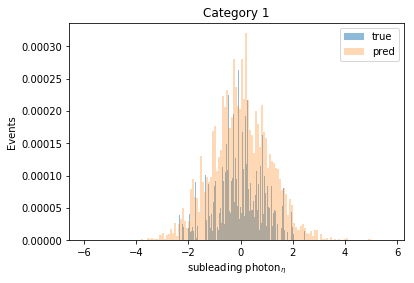

Total number of event in pred hist:  0.00700715
Total number of event in true hist:  0.0100423


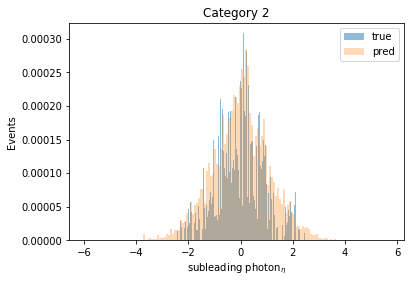

Total number of event in pred hist:  0.00251552
Total number of event in true hist:  0.00297951


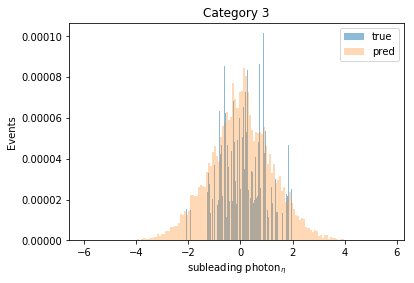

Total number of event in pred hist:  0.00069165
Total number of event in true hist:  0.000101241


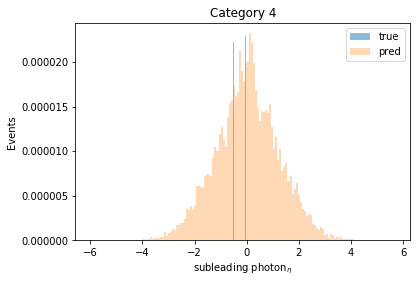

Total number of event in pred hist:  0.00154189
Total number of event in true hist:  0.00162533


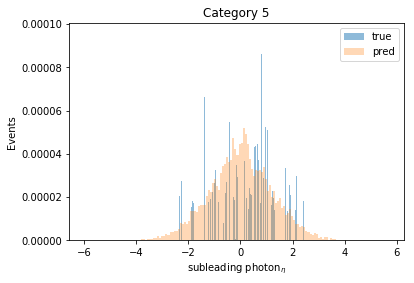

Total number of event in pred hist:  0.00266522
Total number of event in true hist:  0.0035782


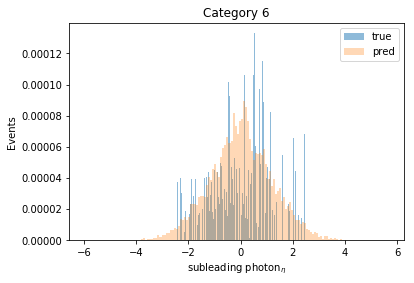

Total number of event in pred hist:  0.00203945
Total number of event in true hist:  0.00194143


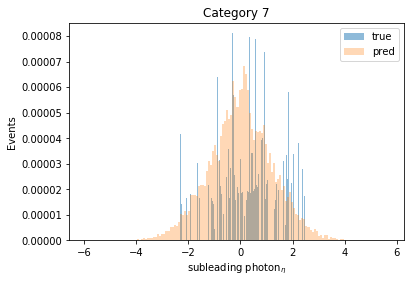

Total number of event in pred hist:  0.000962957
Total number of event in true hist:  0.000328202


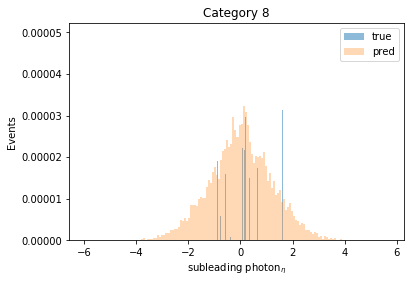

Total number of event in pred hist:  0.00137539
Total number of event in true hist:  0.00152351


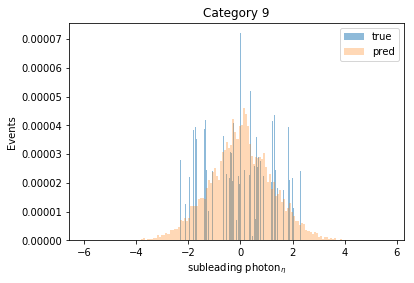

Total number of event in pred hist:  0.00336241
Total number of event in true hist:  0.00528963


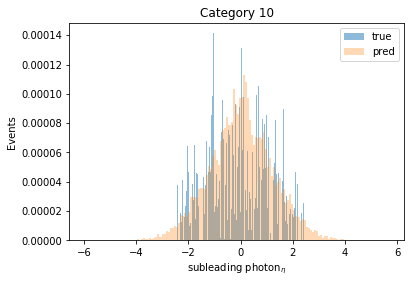

Total number of event in pred hist:  0.00281093
Total number of event in true hist:  0.00300841


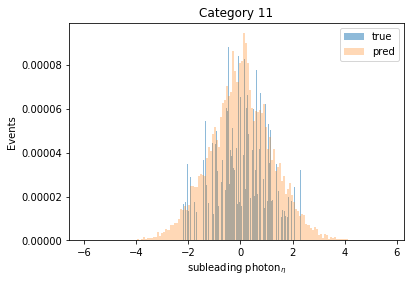

Total number of event in pred hist:  0.00129761
Total number of event in true hist:  0.00035321


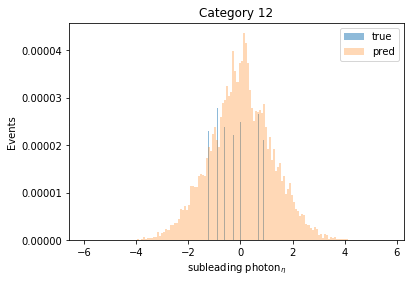

In [21]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['subleadPho_eta'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['subleadPho_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['subleadPho_eta'].ravel(),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['subleadPho_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("subleading photon$_{\eta}$")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()

Total number of event in pred hist:  0.149873
Total number of event in true hist:  0.146575


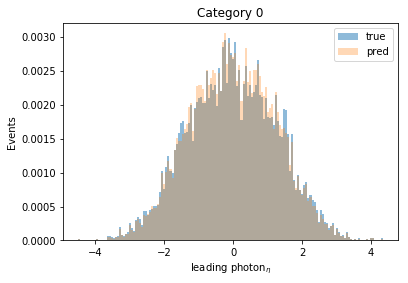

Total number of event in pred hist:  0.0079318
Total number of event in true hist:  0.00672883


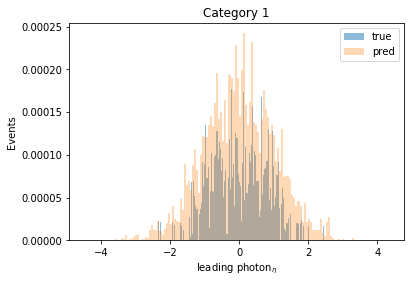

Total number of event in pred hist:  0.00700715
Total number of event in true hist:  0.0100423


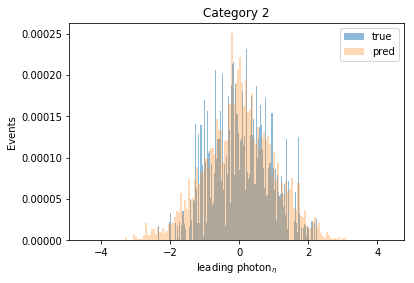

Total number of event in pred hist:  0.00251552
Total number of event in true hist:  0.00297951


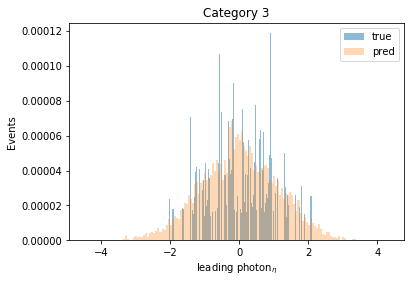

Total number of event in pred hist:  0.00069165
Total number of event in true hist:  0.000101241


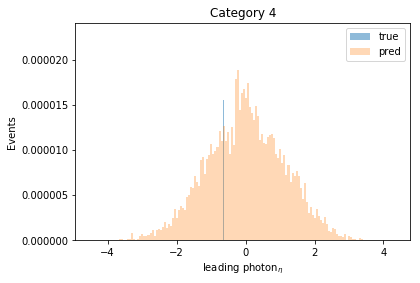

Total number of event in pred hist:  0.00154189
Total number of event in true hist:  0.00162533


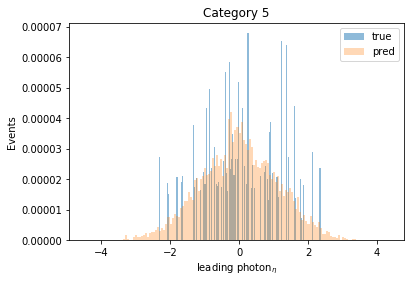

Total number of event in pred hist:  0.00266522
Total number of event in true hist:  0.0035782


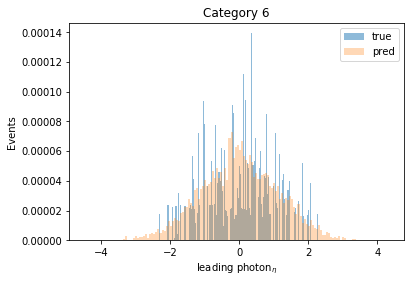

Total number of event in pred hist:  0.00203945
Total number of event in true hist:  0.00194143


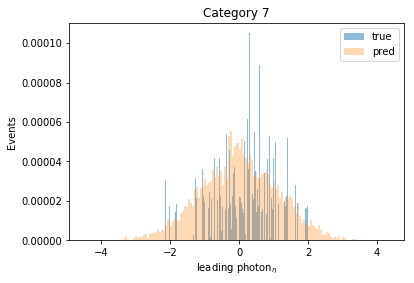

Total number of event in pred hist:  0.000962957
Total number of event in true hist:  0.000328202


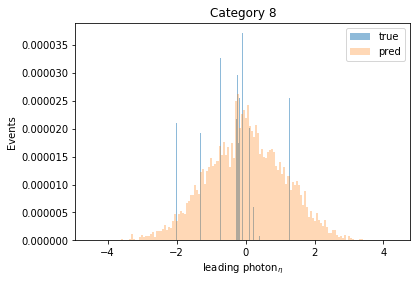

Total number of event in pred hist:  0.00137539
Total number of event in true hist:  0.00152351


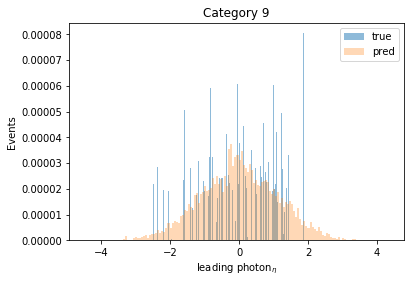

Total number of event in pred hist:  0.00336241
Total number of event in true hist:  0.00528963


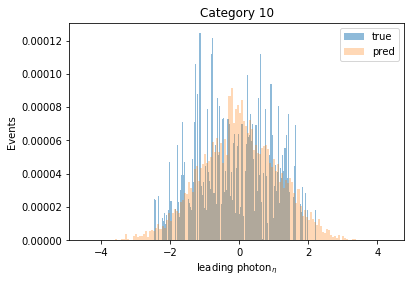

Total number of event in pred hist:  0.00281093
Total number of event in true hist:  0.00300841


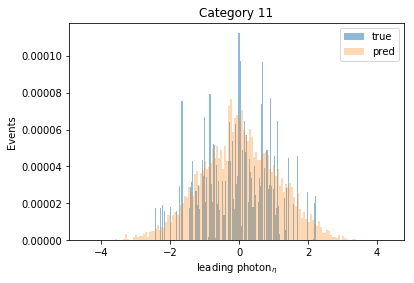

Total number of event in pred hist:  0.00129761
Total number of event in true hist:  0.00035321


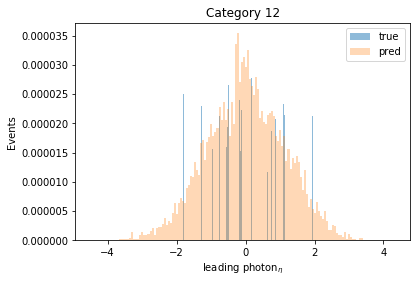

In [22]:
for i in range (0,13):
    cat_true=df[df.cat_true==i]
    plt.hist(cat_true['leadPho_eta'].ravel(),weights=cat_true.w_true.ravel(),bins=150,alpha=0.5,label='true')
    plt.hist(df['leadPho_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150,alpha=0.3,label='pred')
    h_true=np.histogram(cat_true['leadPho_eta'].ravel(),weights=cat_true.w_true,bins=150)
    h_pred=np.histogram(df['leadPho_eta'].ravel(),weights=y_pred_weight[i].ravel(),bins=150)
    print "Total number of event in pred hist: ",np.sum(h_pred[0])
    print "Total number of event in true hist: ",np.sum(h_true[0])
    plt.ylabel("Events")
    plt.xlabel("leading photon$_{\eta}$")
    plt.title('Category %d'%i)
    plt.legend()
    plt.show()
    plt.close()